#### multiple linear regression: y = w0 + w1x1 + w2x2 + .... 형태

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv('50_Startups.csv').values
print(dataset)
print(dataset.shape)

[[165349.2 136897.8 471784.1 'New York' 192261.83]
 [162597.7 151377.59 443898.53 'California' 191792.06]
 [153441.51 101145.55 407934.54 'Florida' 191050.39]
 [144372.41 118671.85 383199.62 'New York' 182901.99]
 [142107.34 91391.77 366168.42 'Florida' 166187.94]
 [131876.9 99814.71 362861.36 'New York' 156991.12]
 [134615.46 147198.87 127716.82 'California' 156122.51]
 [130298.13 145530.06 323876.68 'Florida' 155752.6]
 [120542.52 148718.95 311613.29 'New York' 152211.77]
 [123334.88 108679.17 304981.62 'California' 149759.96]
 [101913.08 110594.11 229160.95 'Florida' 146121.95]
 [100671.96 91790.61 249744.55 'California' 144259.4]
 [93863.75 127320.38 249839.44 'Florida' 141585.52]
 [91992.39 135495.07 252664.93 'California' 134307.35]
 [119943.24 156547.42 256512.92 'Florida' 132602.65]
 [114523.61 122616.84 261776.23 'New York' 129917.04]
 [78013.11 121597.55 264346.06 'California' 126992.93]
 [94657.16 145077.58 282574.31 'New York' 125370.37]
 [91749.16 114175.79 294919.57 'Flor

In [4]:
# X는 첫 3개의 열 (R&D Spend, Administration, Marketing Spend), State는 제외
X = dataset[:,:-2]
# index -2는 마지막으로부터 두번째 index를 의미함

# y는 마지막 열(Profit)
y = dataset[:,-1]
print(X.shape, y.shape)

# R&D, Administration, Marketing 투자 비용을 입력으로 하여, 
# 기업의 Profit(이익)을 예측함

(50, 3) (50,)


In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [6]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(40, 3) (10, 3) (40,) (10,)


## Linear regression model 생성

In [7]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train,y_train)

LinearRegression()

In [8]:
# R&D에 150000, Administration에 100000, Marketing에 200000를 투자했을 때, 이익은?
lr.predict([[150000,100000,200000]])

array([170782.12215042])

In [9]:
y_pred = lr.predict(X_test)
print(y_pred)

[114729.00768236  90569.03231312  75952.34861633  70179.81117586
 179539.15187896 171638.15637459  49624.94193162 102253.12475568
  58381.67907     98240.74724733]


In [10]:
y_pred_train = lr.predict(X_train)

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
train_mse = mean_squared_error(y_train,y_pred_train)
test_mse = mean_squared_error(y_test,y_pred)

train_mae = mean_absolute_error(y_train,y_pred_train)
test_mae = mean_absolute_error(y_test,y_pred)

train_r2 = r2_score(y_train,y_pred_train)
test_r2 = r2_score(y_test,y_pred)

print('Mean Squared Error')
print('Train MSE: ', train_mse)
print('Test MSE: ', test_mse)
print('Mean Absolute Error')
print('Train MAE: ', train_mae)
print('Test MAE: ', test_mae)
print('R2')
print('Train R2: ', train_r2)
print('Test R2: ', test_r2)

Mean Squared Error
Train MSE:  80099497.879207
Test MSE:  79195300.7280719
Mean Absolute Error
Train MAE:  6169.176031115809
Test MAE:  7659.119032814677
R2
Train R2:  0.94240260741009
Test R2:  0.9650940934427324


###  시각화

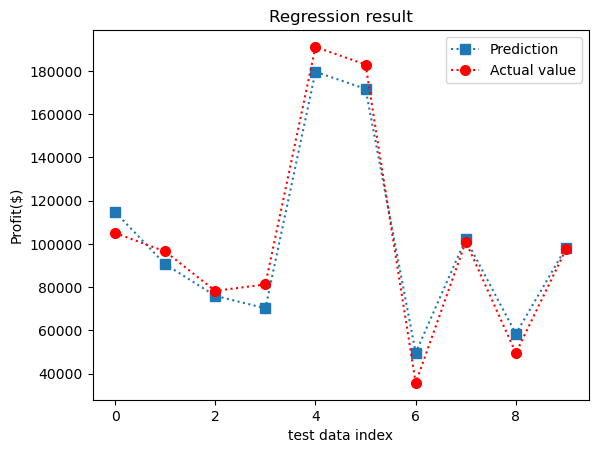

In [24]:
plt.plot(y_pred,marker='s',markersize=7,linestyle=':',label='Prediction')
plt.plot(y_test,marker='o',markersize=7,linestyle=':',label='Actual value',color='red')
plt.xlabel('test data index')
plt.ylabel('Profit($)')
plt.title('Regression result')
plt.legend()
plt.show()